## HR Analytics Project- Understanding the Attrition in HR

## Problem statement 

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

## The Data

Loading the data by reading the csv file as data frame

In [2]:
df=pd.read_csv('HR-Employee-Attrition.csv')

## Exploratory Data Analysis

Exploratory Data Analysis is use to answer all the question like test assumptions, Analysis the data. The main use of it to prepare the data for modeling

there are lot of ways to reach the goals, we can get a basic description of the data,visualize it identify patterens in it, identify the callenges of using data,etc

### Statistical summary

Summarizing your dataset through descriptive statistics, to use a variety of measurements to better understand your dataset.

##### shape function

shape function gives the dimention of dataframe

In [3]:
df.shape

(1470, 35)

we have 1470 rows and 35 columns

##### head() function

head() function is to display the first 5 rows of dataframe

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### tail() function

tail() function is use to display last 5 row of data frame

In [5]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


#####  sample() function

sample() function is show the sample randomly

In [6]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1183,36,No,Travel_Rarely,1040,Research & Development,3,2,Life Sciences,1,1664,...,1,80,1,13,3,3,5,4,0,4
689,20,Yes,Travel_Rarely,129,Research & Development,4,3,Technical Degree,1,960,...,2,80,0,1,2,3,1,0,0,0
1147,49,No,Travel_Rarely,722,Research & Development,25,4,Life Sciences,1,1617,...,4,80,1,10,3,2,9,6,1,4
1045,40,No,Travel_Rarely,896,Research & Development,2,3,Medical,1,1474,...,3,80,1,8,3,4,3,1,1,2
1341,31,No,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,...,1,80,1,10,2,3,10,8,0,2
1228,41,No,Non-Travel,552,Human Resources,4,3,Human Resources,1,1722,...,2,80,1,10,4,3,3,2,1,2
357,21,Yes,Travel_Frequently,756,Sales,1,1,Technical Degree,1,478,...,3,80,0,3,3,3,3,2,1,2
36,50,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,47,...,3,80,0,3,2,3,3,2,0,2
913,45,Yes,Travel_Rarely,1449,Sales,2,3,Marketing,1,1277,...,1,80,0,26,2,3,24,10,1,11
720,30,Yes,Travel_Rarely,138,Research & Development,22,3,Life Sciences,1,1004,...,2,80,0,7,2,3,5,2,0,1


##### dtype function

dtypes is use to disply the datatype of data frame

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

we have 9 columns [Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime] are object, remaining columns are int64 dtype

##### info() function

info() function gives the range of index,data coulmns count,column names, non-null count, dtype of dataframe,dtypes total and memory usage 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

we have 1470 RangeIndex 0 to 1469 and 35 total data column, in that we have 26 columns are int64 dtype and 9 columns are object dtype and the 402.1+ KB memory usage

##### isnull() function

isnull() function is use to know the null values in data frame, it give th values True and False 

if value is True it indicates null vlaue,else it give false

In [9]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Here we have 1470 rows and 35 columns, we can't go to each row and column to check the values that is null or not 

##### isnull().sum() function

isnull().sum() it give the count of null values present in column 

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

here we can notice that there is no null values in dataframe

### Describe the data

describe function gives the imfomation of count of variables that used to calculate if their is null values that shows less numberrow rows than given in dimention, and function also it gives the infomation of mean, standard deviation,minimum value,25th percentile,50th percentile(which is median),75th percentile and in last it gives maximum value of each column 

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In the description we can see only 26 columns remaining 9 columns are object type 

Here median (50percentile) is more than mean as usalu and there is no much different in 75 percentile  and max value. so data is normaly distributed there is no indication of outliers 

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [14]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [15]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [16]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

StandardHours,Over18,EmployeeCount 3 columns has only 1 value so there is no effect of target variables

In [17]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

We have 3 departments in given dataframe

In [18]:
df1=df.drop(['StandardHours','Over18','EmployeeCount','EmployeeNumber'],axis=1)

Here we have attrition is decreases the size of the workforce, here yes means employee left the company and no is employee still working 

here we change the yes as 0 and  no is 1

and EmployeeNumber column has unique for each one and those are like employee Id

In [19]:
# Reassign response variable
df1['Attrition'] = df1['Attrition'].apply(lambda x: 0 if x == 'Yes' else 1)

In [20]:
df1['Attrition'].value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

here 1233 emplyoees are still working in company and 237 are left the company with some reason

In [21]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Data Visualization

Data visualization is a technique that uses an array of static and interactive visuals within a specific context to help people understand and make sense of large amounts of data. The data is often displayed in a story format that visualizes patterns, trends and correlations that may otherwise go unnoticed.


we are using two libraries 

1.matplotlib.pyplot

2.seaborn

<AxesSubplot:>

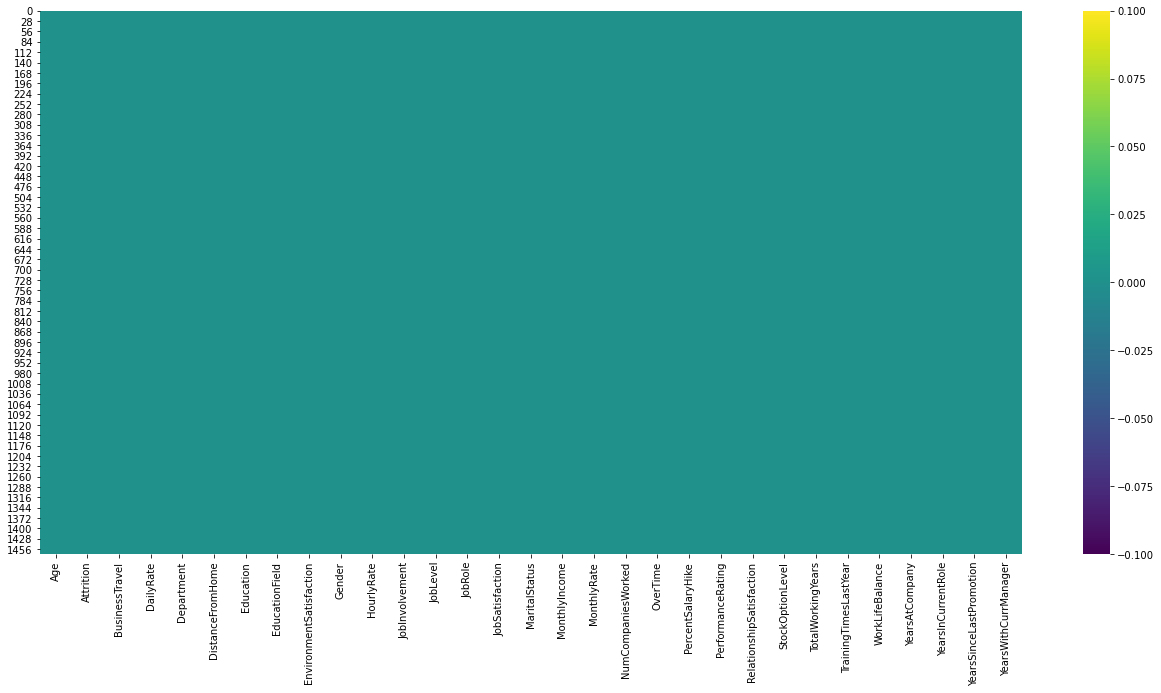

In [22]:
plt.figure(figsize=(22,10))
sns.heatmap(df1.isnull(),cmap='viridis')

there is no null value in the give dataframe so we dont have any different shade in the plot

### Correlation

Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.

A positive correlation is a relationship between two variables in which both variables either increase or decrease at the same time. An example would be height and weight. Taller people tend to be heavier.

A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).

A zero correlation exists when there is no relationship between two variables. For example, there is no relationship between the amount of tea drunk and level of intelligence.

### Strength of correlation
prefect +1,-1

strong +(0.9 to 0.7) & (-0.9 to -0.7)

moderate +(0.6 to 0.4) & (-0.6 to -0.4)

week +(0.3 to 0.1) & (-0.3 to -0.1)

Zero 0

In [23]:
cor=df1.corr()

<AxesSubplot:>

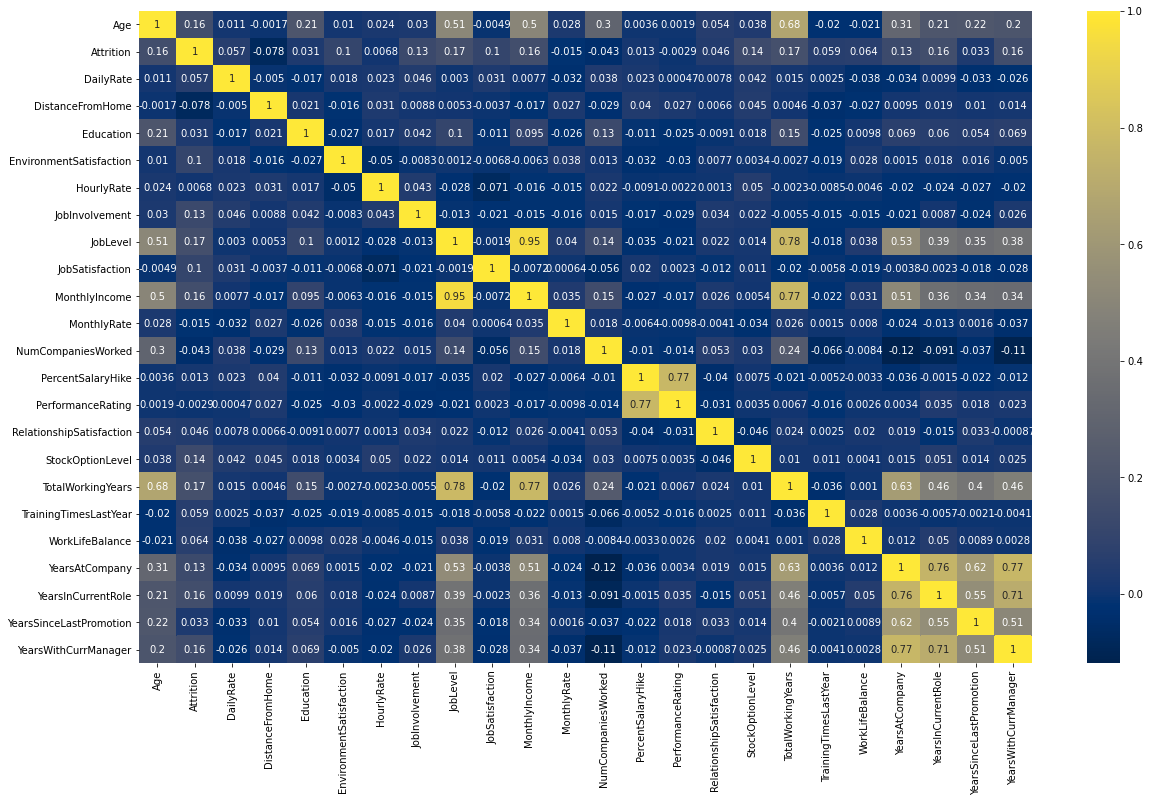

In [24]:
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='cividis')

above plot show that all the feature have week correlation with the response variable 

<AxesSubplot:xlabel='Age', ylabel='count'>

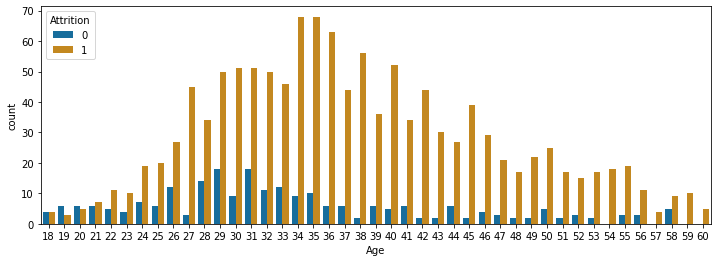

In [25]:
plt.subplots(figsize=(12,4))
sns.countplot(x = 'Age', hue = 'Attrition', data = df1, palette = 'colorblind')

In [26]:
print('minimum age of employee:', min(df1['Age']))
print('maximum age of employee:', max(df1['Age']))

minimum age of employee: 18
maximum age of employee: 60


Labeling the age groups

In [27]:
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
bins = [17, 21, 25, 35, 60]
Age_group= pd.cut(df1['Age'],bins, labels = group_names)

In [28]:
Age_group.value_counts()

(36-60)    741
(26-35)    606
(22-25)     82
(18-21)     41
Name: Age, dtype: int64

we have 50% employees are 36+ aged

41% employees are aged between26 to 35

5.5% employees are aged between 22 to 25

and 2.7% employees are aged between 18- 21

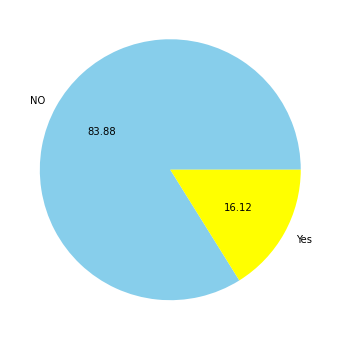

In [29]:
plt.figure(figsize=(6,6))
plt.pie(df1['Attrition'].value_counts(),colors=['skyblue','Yellow'],labels=['NO','Yes'],autopct='%.2f' )
plt.show()

here we have 83.88% employees are working in company and 16.12% employees left the company with some reason

In [30]:
df1['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

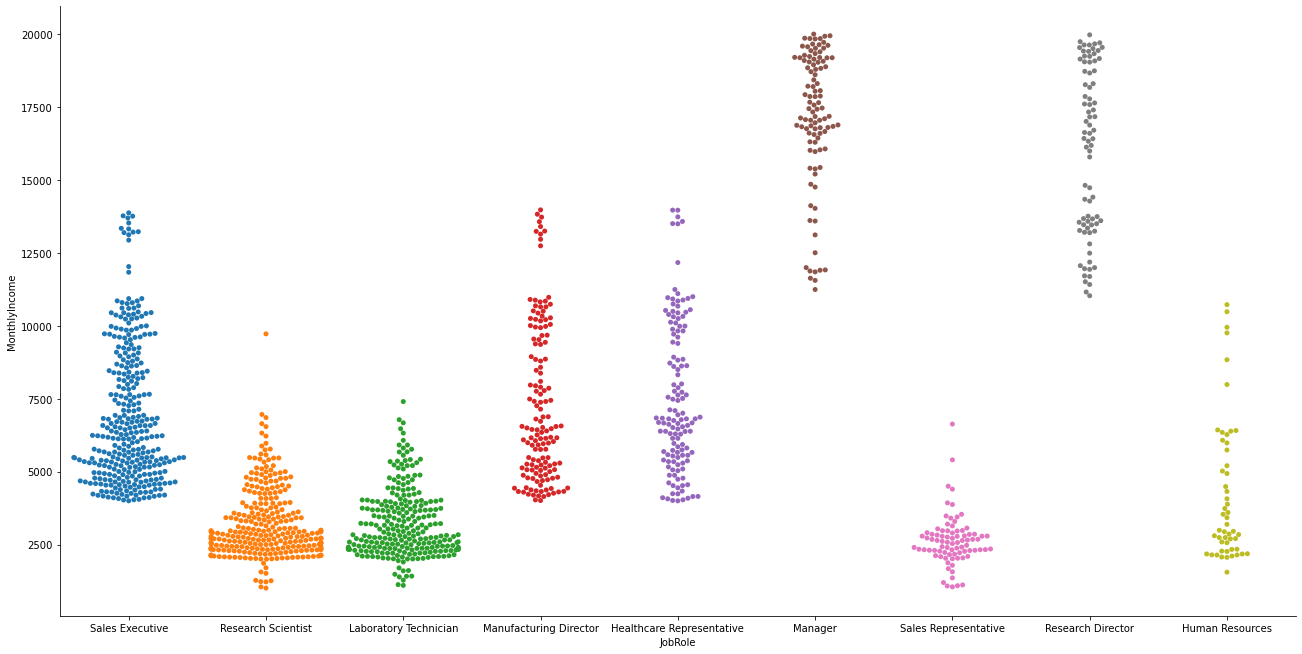

In [31]:
sns.catplot(data = df1, x = 'JobRole', y = 'MonthlyIncome',kind = 'swarm', aspect = 2, height = 9)

Manager and reaseach Director jobroles are highpay sacale, salaries above 12500

Sales Executive,Manufacturing Director and Healthcare Representative are next range of modrate salaries above 4000 to below 15000

Research Scientist,Laboratory Technician and Sales Representative and HumanResourcers are the low level pay scale in the company

In [32]:
df1['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

we have 3 type of employees who travel or not like regular or frequently and non-travel

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

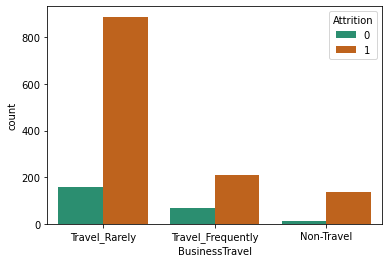

In [33]:
sns.countplot(data=df1,x='BusinessTravel',hue='Attrition',palette='Dark2')

In the company, most of the employee travel rarely or don't travel according to their job description.That group compose the 70% of entire company.The rest of the company employees which is 29.05% of them has to travel frequently and non-travel 

Male      882
Female    588
Name: Gender, dtype: int64

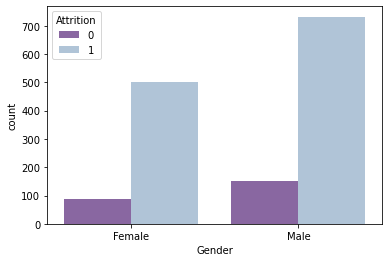

In [34]:
sns.countplot(data=df1,x= 'Gender',hue='Attrition',palette='BuPu_r')
df['Gender'].value_counts()

we have 60% of employees are male and 40 % of female employees as per the polt women employees has high attrition 

In [35]:
df1['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

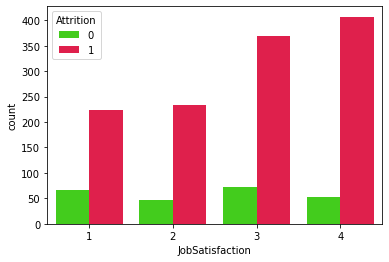

In [36]:
sns.countplot(data=df1,x='JobSatisfaction',hue='Attrition',palette='prism')
df1['JobSatisfaction'].value_counts()

In high job satisfaction,I assume that job satisfaction should not be the main reason for employees to leave the company.

As it may be expected, in low job satisfaction, employees leave the company more than other groups except high satisfaction. 

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

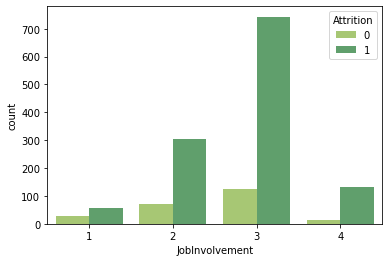

In [37]:
sns.countplot(x='JobInvolvement',data=df1,hue='Attrition',palette='summer_r')
df1['JobInvolvement'].value_counts()

58.16% of all employee's job involvement in the company is in the hight catagory, attrition is also high in the high level job involment,
medium job invlovement indicated by 2 in that 8.28% of employees are involement,
and low level of involvement of employees are 4.8% as and attrition of low level is also high as usal

In [38]:
job_level = df1['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

Level-1    543
Level-2    534
Level-3    218
Level-4    106
Level-5     69
Name: JobLevel, dtype: int64

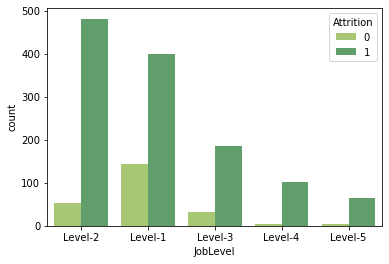

In [39]:
sns.countplot(job_level,hue=df1['Attrition'],palette='summer_r')
job_level.value_counts()

With an increase in job level, there is a decrease in attrition number throughout the company.The highest attrition is observed in the job level-1.

In [40]:
En_satisfaction = df1['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

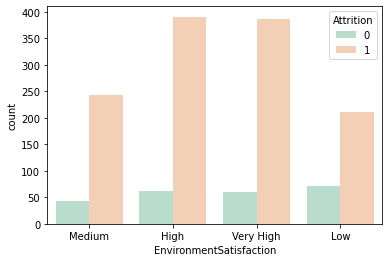

In [41]:
sns.countplot(En_satisfaction,hue=df1['Attrition'],palette='Pastel2')
En_satisfaction.value_counts()

As it may be expected, there is a high attrition rate in the low satisfaction environment. 

In [42]:
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
label= ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
MIncome = pd.cut(df1["MonthlyIncome"], bins, labels = label)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

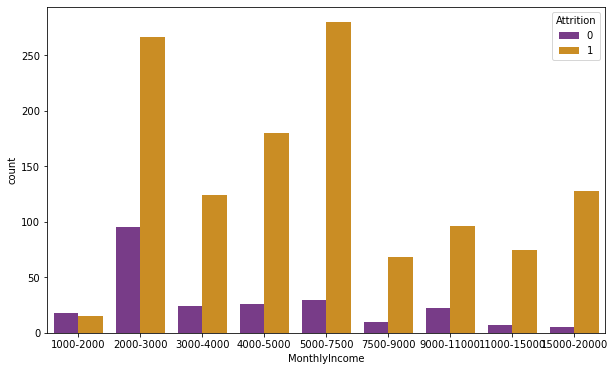

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(MIncome,hue=df1['Attrition'],palette='CMRmap')

most of the employees have salaries below 12500, as per the their job 

As the monthly income increase, it is observed that there is a decrease in attrition.

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

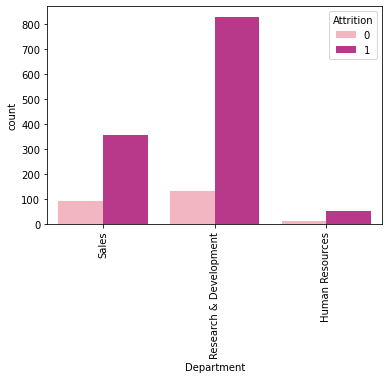

In [44]:
sns.countplot(df1.Department,hue=df1['Attrition'],palette='RdPu')
plt.xticks(rotation=90)

most of the employees are in Research and Development department only,and next in sales and then Human Resources

In [45]:
bins = [0, 3, 6, 10, 29]
label = ['1-3', '4-6', '7-10', '10+']
distance = pd.cut(df1['DistanceFromHome'], bins, labels = label)

1-3     503
10+     444
7-10    335
4-6     188
Name: DistanceFromHome, dtype: int64

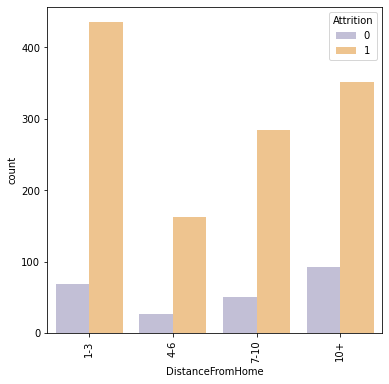

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(distance,hue=df1['Attrition'],palette='PuOr_r')
plt.xticks(rotation=90)
distance.value_counts()

most of the employees are from 3 miles only total 503 members are coming to office with in 3 miles and 444 employees are from (4-6)miles and 335 employeesare from(7-10)miles and 444 employees are from the 10+ miles

we can't take this feature relates to the attrition, because most off the employees are near to office location 

In [47]:
df1['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [48]:
Education = df1['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctoral'})

Bachelor         572
Master           398
College          282
Below College    170
Doctoral          48
Name: Education, dtype: int64

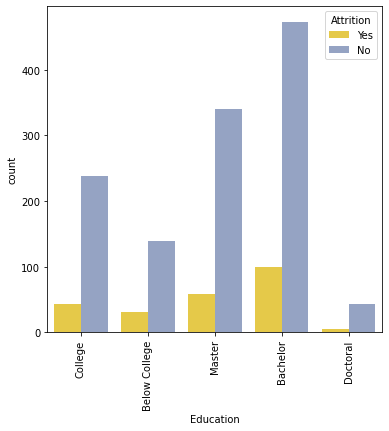

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(Education,hue=df['Attrition'],palette='Set2_r')
plt.xticks(rotation=90)
Education.value_counts()

Employees in companies in different position and for each position we have some job requirements like qualification
here we have values as [1,2,3,4,5] those are changed with [Below college,college,Bachelor,Masters,Doctoral]

as per the position require we need to hire the employees with qualification.here we have 572 of employees having Bachelor and next 398 employees are having Master and 282 are having Below college qulification and 48 employees are Doctoral

In [50]:
df1['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

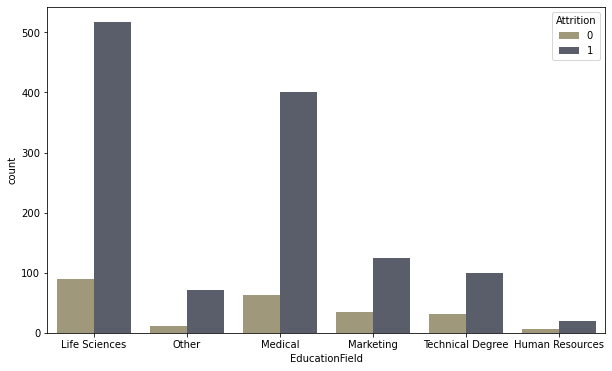

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(df1['EducationField'],hue=df1['Attrition'],palette='cividis_r')
df1['EducationField'].value_counts()

In the feature of EducationField we have Life sciences,Medical,Marketing,Technical Degree,Human Resources and others

41.22% of employees are from Life Sciences Education Field and 31.51% employees are from medical and 10.82% ofemployees are form Marketing and 8.98% of employees are Technical Degree and 1.84% of employees are from Human Resource and 5.57% are from others

In [52]:
df1['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

No     1054
Yes     416
Name: OverTime, dtype: int64

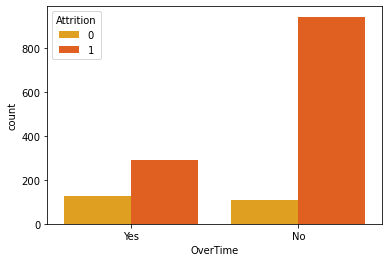

In [53]:
sns.countplot(df1['OverTime'],hue=df1['Attrition'],palette='autumn_r')
df1['OverTime'].value_counts()

28.3% of employees have the over time work in the company.71.7% of employees have not worked over time in the company and if you compare individually both groups, over time employees are much more likely to leave the company.

In [54]:
df1['PerformanceRating'].unique()

array([3, 4], dtype=int64)

3    1244
4     226
Name: PerformanceRating, dtype: int64

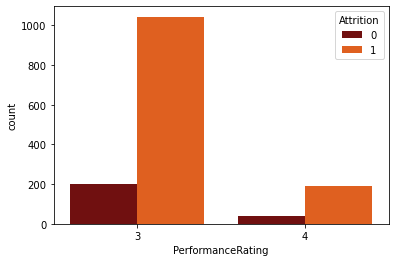

In [55]:
sns.countplot(df1['PerformanceRating'],hue=df1['Attrition'],palette='gist_heat')
df1['PerformanceRating'].value_counts()

we have 84.63% of employees are having  PerformanceRating 3 and 15.37% of employees are having PerformanceRating 4. PerformanceRating indicates the employee efficiency of work how the giving best to complete the assigned task

In [56]:
df1['PercentSalaryHike'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [57]:
bins = [10, 14, 18, 22, 25]
label = ['11-14', '15-18', '19-22', '23-25']             
Hike = pd.cut(df1['PercentSalaryHike'], bins, labels = label)

11-14    818
15-18    350
19-22    235
23-25     67
Name: PercentSalaryHike, dtype: int64

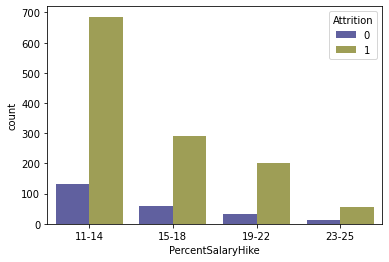

In [58]:
sns.countplot(Hike,hue=df1['Attrition'],palette='gist_stern')
Hike.value_counts()

we have more employees having percent salary hike,they are likely and willingly to stay in the current company. The employees which have the highest percent salary hikes are more likely to leave the company. the reason for that might be due to the fact that they are more qualified and have the chance to find better position in other companies or due to retirement.

In [59]:
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
com_worked = pd.cut(df1['NumCompaniesWorked'], bins, labels = group_names,include_lowest = True, right = False)

1     521
5+    308
0     197
3     159
2     146
4     139
Name: NumCompaniesWorked, dtype: int64

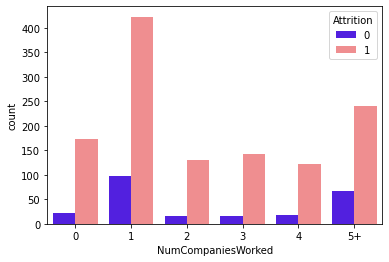

In [60]:
sns.countplot(com_worked,hue=df1['Attrition'],palette='gnuplot2')
com_worked.value_counts()

If employees have one company experience before current company, they are more likely to leave the company. Besides, if employees don't have any experience in other company, they have the second most attrition number.

Also, employees, who has more experience such as working in 5+ companies before the current company, have the highest attrition in their individual experienced group.

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

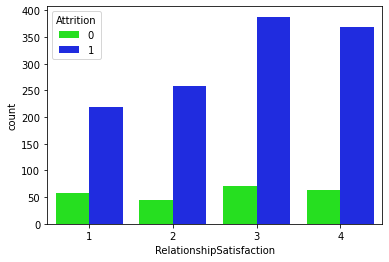

In [61]:
sns.countplot(df1['RelationshipSatisfaction'],hue=df1['Attrition'],palette='hsv')
df1['RelationshipSatisfaction'].value_counts()

Relationship satisfaction is aligned with rating. here we have most of employees are with rate 3 and herewe can clearly observe that all the level has almost same attrition level

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

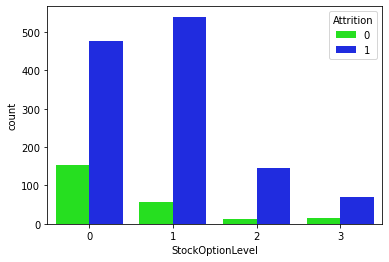

In [62]:
sns.countplot(df1['StockOptionLevel'],hue=df1['Attrition'],palette='hsv')
df1['StockOptionLevel'].value_counts()

If stock option level is 0, there occurs a huge attrition in the company.Besides, as the stock option level increase, there is a decrease in attrition number.

In [63]:
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
work_year = pd.cut(df1['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

6-10     607
2-5      224
20+      207
11-15    191
16-20    149
1         92
Name: TotalWorkingYears, dtype: int64

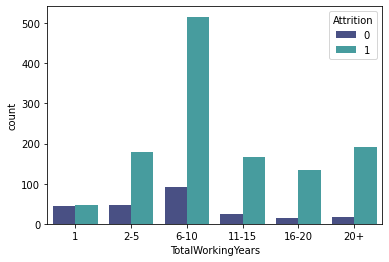

In [64]:
sns.countplot(work_year,hue=df1['Attrition'],palette='mako')
work_year.value_counts()

Employees who have one year or less working experience are more likely to leave the company. In addition to that, employees who have 6-10 years' experience have also second highest attrition percent

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

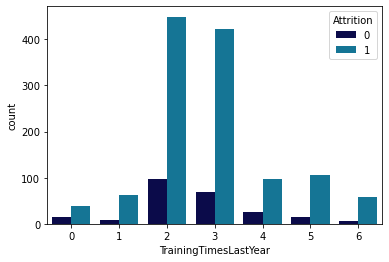

In [65]:
sns.countplot(df1['TrainingTimesLastYear'],hue=df1['Attrition'],palette='ocean')
df1['TrainingTimesLastYear'].value_counts()

Employees who has 2 and 3 times training last year has the most attrition number respectively. Employees who don't have training time beforehand has the highest attrition in its individual group.

In [66]:
work_bal = df1['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})

Better    893
Good      344
Best      153
Bad        80
Name: WorkLifeBalance, dtype: int64

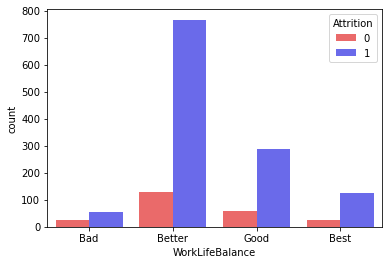

In [67]:
sns.countplot(work_bal,hue=df1['Attrition'],palette='seismic_r')
work_bal.value_counts()

In general, work life balance is satisfactorily good throughout the company. But we have the highest attrition number and percentage throughout the company.

Besides, bad work life balance group has highest attrition percentage in its individual group.

In [68]:
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
years_com= pd.cut(df1['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

2-5     561
6-10    448
10+     246
1       215
Name: YearsAtCompany, dtype: int64

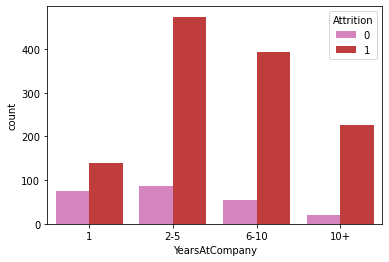

In [69]:
sns.countplot(years_com,hue=df1['Attrition'],palette='tab10_r')
years_com.value_counts()

Employees who have one year or less working experience in the company has the highest attrition percentage in its individual experience group. The 2-5 years working experience at the company and all attrition in the company.

In [70]:
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
year_cur_role= pd.cut(df1['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

2-4     611
1       301
7       222
8-10    185
10+      78
5-6      73
Name: YearsInCurrentRole, dtype: int64

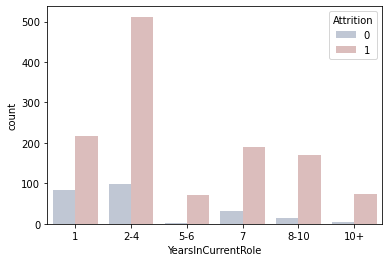

In [71]:
sns.countplot(year_cur_role,hue=df1['Attrition'],palette='vlag')
year_cur_role.value_counts()

Employees who don't fulfill their first year and in their first year in their current role are more likely to leave the company. That might be result of challenge or not satisfied with the current role.

Employees who have 2-4 years' experience in that company compose of the maximum attrition percentage and number in the company.

Besides that, after years in current role, employees are willing to leave the company. That might be result of looking for better opportunities in other companies.

In [72]:
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
last_promotion= pd.cut(df1['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

0      581
1      357
2      159
4-6    138
8+     107
7       76
3       52
Name: YearsSinceLastPromotion, dtype: int64

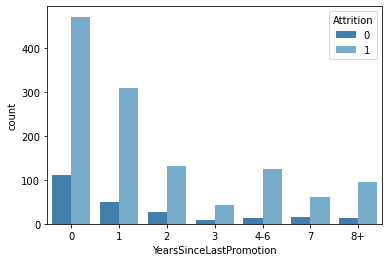

In [73]:
sns.countplot(last_promotion,hue=df1['Attrition'],palette='tab20c')
last_promotion.value_counts()

Employees who don't fulfill his one year since the last promotion in the company are more likely to leave the company. And employees who have one and two years experience

In [74]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
years_curmanager= pd.cut(df1['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

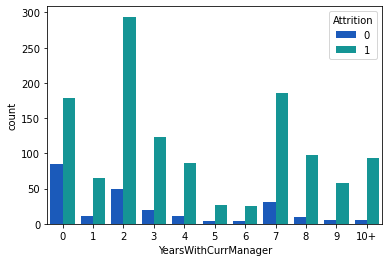

In [75]:
sns.countplot(years_curmanager,hue=df1['Attrition'],palette='winter')

Most of the employee quit the company before completing their first year with their current manager. Other group who leaves the company most is the ones who work two years with current manager.

In [76]:
df2=df1.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'],axis=1)

## LabelEncoding

In [77]:
df2['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

We have only 2 elements in Overtiem, yes or No, the employee did over time or not

In [78]:
le=LabelEncoder()
df2['OverTime']=le.fit_transform(df2['OverTime'])
df2['OverTime'].unique()

array([1, 0])

the values are changed yes as 1 and no as 0

In [79]:
df2.shape

(1470, 25)

after droping un nessesary columns we have 25 columns in the data frame

## Check outlier

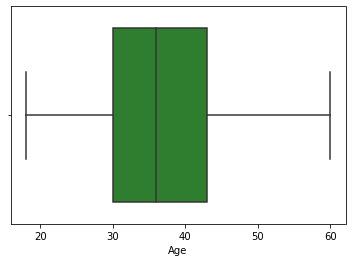

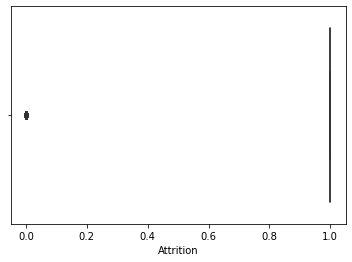

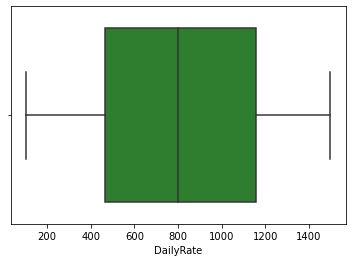

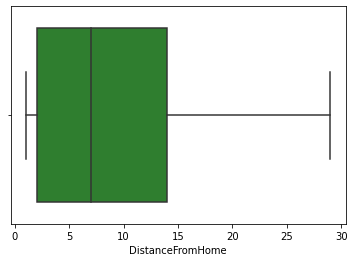

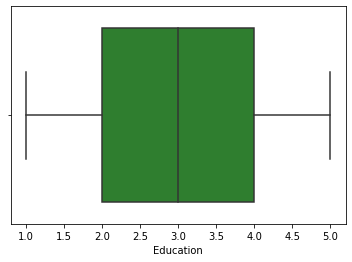

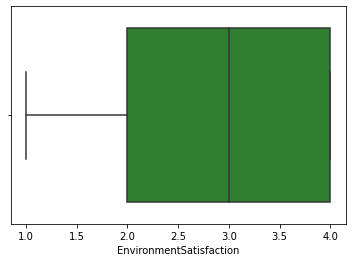

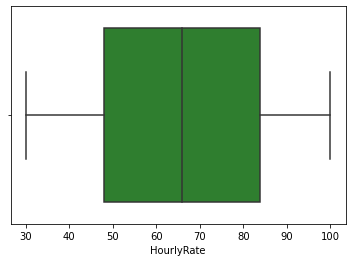

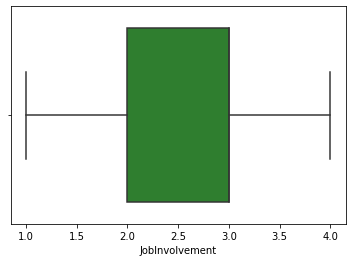

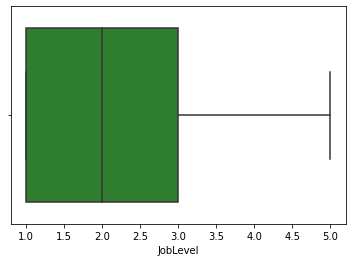

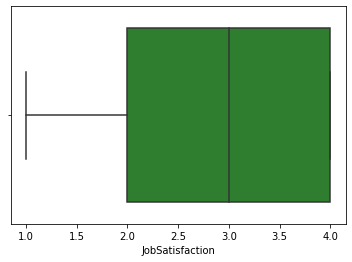

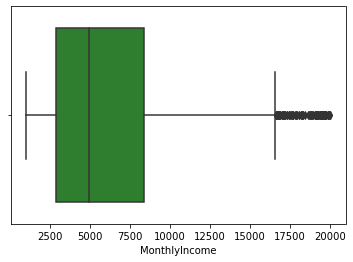

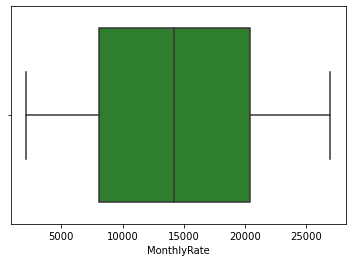

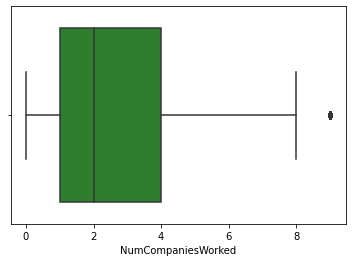

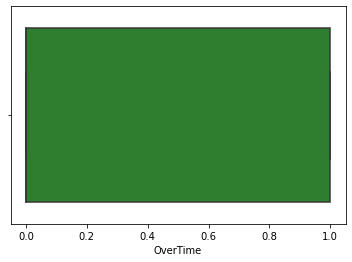

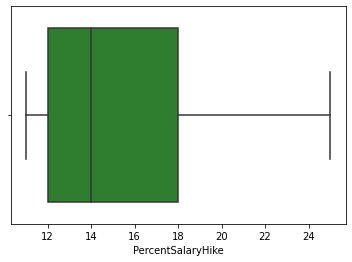

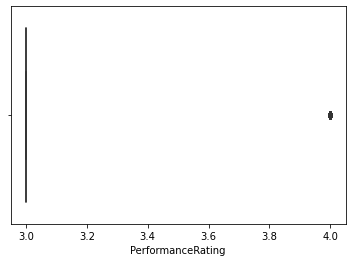

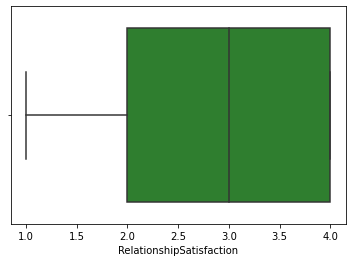

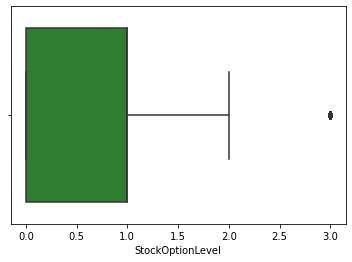

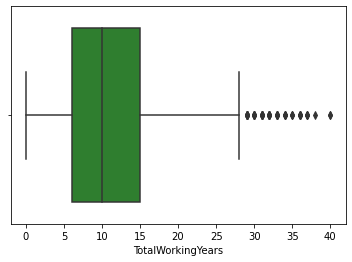

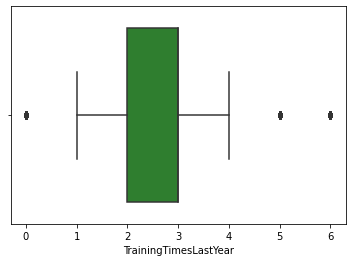

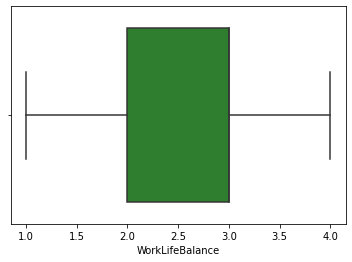

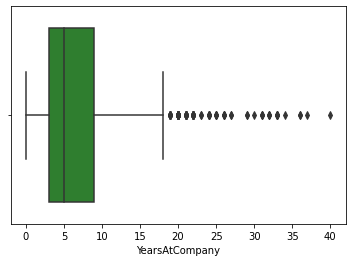

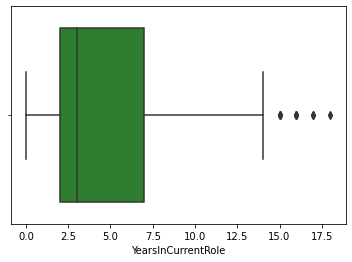

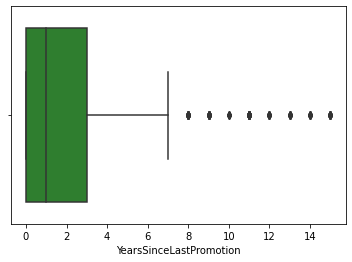

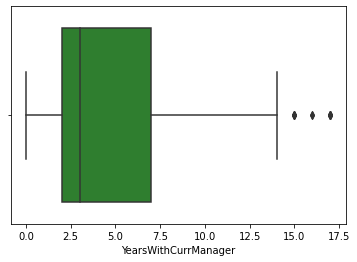

In [80]:
for i in df2.columns:
    sns.boxplot(df2[i],color='forestgreen')
    plt.show()

MothlyIncome,TotalWorkingYears,TraingingTimeLastYear,YearsAtCompany,YearInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager are having more than 3 outliers

NumCompaniesWorked, PerformanceRating,StockOptionLevel are having only one outliers and they are near to whiskar 

Here we are about the prefomance of emplyoee and they stayed in company or not for that we cann't lose one single entry it may effect the data so here we are not clearing the ouliers in these


In [81]:
df2.skew()

Age                         0.413286
Attrition                  -1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

#### split the traget and features

here over target is Attrition, that is employee is working for the company or not

In [82]:
x=df2.drop('Attrition',axis=1)
y=df2['Attrition']

In [83]:
x.shape

(1470, 24)

In [84]:
y.shape

(1470,)

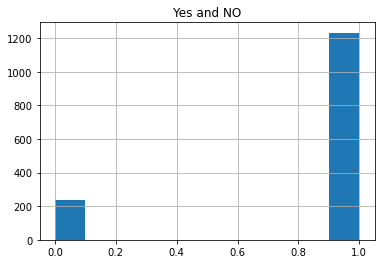

In [85]:
y.hist(grid=True)
plt.title("Yes and NO")
plt.show()

we have imbalance in dataframe so need to resample the dataframe

In [86]:
os=RandomOverSampler()
x_res,y_res=os.fit_resample(x,y)

In [87]:
x_res.shape,y_res.shape

((2466, 24), (2466,))

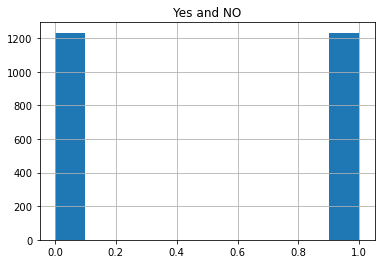

In [88]:
y_res.hist(grid=True)
plt.title("Yes and NO")
plt.show()

### Finding Best Randam_State

In [90]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=i)
    le=LogisticRegression()
    le.fit(x_train,y_train)
    pred=le.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is",maxAccu,"on random_state", maxRS)

Best accuracy score is 0.8 on random_state 2


### define function 

In [91]:
def train_test(model):
    print('model name:', model)
    model=LogisticRegression()
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("accuracy score:",accuracy_score(y_test,pred))
    print("confusion matrix:",confusion_matrix(y_test,pred))
    print("classification report:",classification_report(y_test,pred))
    print("roc_auc_score:",roc_auc_score(y_test,pred))

In [92]:
def score(model):
    scr=cross_val_score(model,x,y,cv=5)
    print("Cross validation score of LogisticRegression model:",scr.mean())

## train_test_split

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=30,random_state=2)

In [94]:
x_train.shape

(2436, 24)

In [95]:
x_test.shape

(30, 24)

In [96]:
y_train.shape

(2436,)

In [97]:
y_test.shape

(30,)

## Apply LogisticRegression

In [98]:
train_test(LogisticRegression())

model name: LogisticRegression()
accuracy score: 0.8
confusion matrix: [[10  2]
 [ 4 14]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

roc_auc_score: 0.8055555555555555


In [99]:
score(LogisticRegression())

Cross validation score of LogisticRegression model: 0.8408163265306122


## Apply DecisionTreeClassifier

In [100]:
train_test(DecisionTreeClassifier())

model name: DecisionTreeClassifier()
accuracy score: 0.8
confusion matrix: [[10  2]
 [ 4 14]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

roc_auc_score: 0.8055555555555555


In [101]:
score(DecisionTreeClassifier())

Cross validation score of LogisticRegression model: 0.7857142857142858


## Apply RandomForestClassifier

In [102]:
train_test(RandomForestClassifier())

model name: RandomForestClassifier()
accuracy score: 0.8
confusion matrix: [[10  2]
 [ 4 14]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

roc_auc_score: 0.8055555555555555


In [103]:
score(RandomForestClassifier())

Cross validation score of LogisticRegression model: 0.8605442176870748


## Apply GaussianNB

In [104]:
train_test(GaussianNB())

model name: GaussianNB()
accuracy score: 0.8
confusion matrix: [[10  2]
 [ 4 14]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

roc_auc_score: 0.8055555555555555


In [105]:
score(GaussianNB())

Cross validation score of LogisticRegression model: 0.7877551020408163


## Apply SGDClassifier

In [106]:
train_test(SGDClassifier())

model name: SGDClassifier()
accuracy score: 0.8
confusion matrix: [[10  2]
 [ 4 14]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

roc_auc_score: 0.8055555555555555


In [107]:
score(SGDClassifier())

Cross validation score of LogisticRegression model: 0.7299319727891156


## Apply KNeighborsClassifier

In [108]:
train_test(KNeighborsClassifier())

model name: KNeighborsClassifier()
accuracy score: 0.8
confusion matrix: [[10  2]
 [ 4 14]]
classification report:               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.88      0.78      0.82        18

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30

roc_auc_score: 0.8055555555555555


In [109]:
score(KNeighborsClassifier())

Cross validation score of LogisticRegression model: 0.8285714285714286


## Conclusion

To conclued as best model we need to find the difference between accuracy score and cross validation score for all model, which model gives less difference that is the best model

After applying different machine learning algorithms we got DecisionTreeClassifier as our best model

##  Hyper parameter Tuning 

In [111]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameters = {"criterion":["gini", "entropy"],"max_depth":[3,4,5,6,7,8,10,25],"min_samples_split":[2,5,8,10,12,18,25],
             "max_features":['auto','sqrt',"log2"],"min_samples_leaf":[1,3,5,6,7]}
gcv_dt= GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,n_jobs=-1,cv=8,verbose=2)

gcv_dt.fit(x_train,y_train)

Fitting 8 folds for each of 1680 candidates, totalling 13440 fits


GridSearchCV(cv=8, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 10, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 6, 7],
                         'min_samples_split': [2, 5, 8, 10, 12, 18, 25]},
             verbose=2)

In [114]:
gcv_pred=gcv_dt.predict(x_test)

In [115]:
gcv_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [116]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))
print("roc_auc_score:",roc_auc_score(y_test,gcv_pred))

accuracy score: 0.9666666666666667
roc_auc_score: 0.9722222222222222


In [118]:
logit_roc_auc1=roc_auc_score(y_test,gcv_pred)
fpr,tpr,thresholds=roc_curve(y_test,gcv_dt.predict_proba(x_test)[:,1])

In [119]:
fpr

array([0., 0., 1.])

In [120]:
tpr

array([0.        , 0.94444444, 1.        ])

In [121]:
thresholds

array([2., 1., 0.])

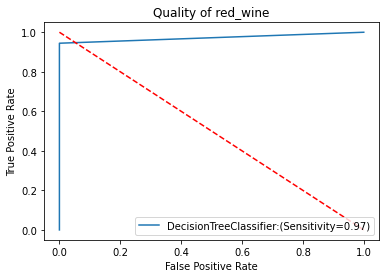

In [122]:
plt.figure()
plt.plot(fpr,tpr,label='DecisionTreeClassifier:(Sensitivity=%0.2f)'%logit_roc_auc1)
plt.plot([0,1],[1,0],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Quality of red_wine')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

## Saving the model

In [123]:
import joblib
joblib.dump(gcv_dt,"HR-Analytics-project.pkl")

['HR-Analytics-project.pkl']

## Load the saved model

In [124]:
model=joblib.load('HR-Analytics-project.pkl')

In [125]:
pred=model.predict(x_test)

In [127]:
print("accuracy score:",accuracy_score(y_test,gcv_pred))
print("roc_auc_score:",roc_auc_score(y_test,gcv_pred))

accuracy score: 0.9666666666666667
roc_auc_score: 0.9722222222222222
